In [61]:
%load_ext memory_profiler
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
import os
from fits_reader import shelf
from fits_reader import fits_reader
import importlib
import glob
importlib.reload(fits_reader)
importlib.reload(shelf)
import gc
import numpy as np
arms = ["armS","armM","armL"]
home_directory = os.environ['HOME']
season_name = "/202106_flight"
# /Volumes/ciber2/Data/202106_flight/dr20210913/ch3
experiment_name = "/"
experiment_directory = home_directory + season_name + experiment_name
print(experiment_directory)
eps_shelf = shelf.make_reduction_shelf(experiment_directory)
imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
/home/ciber2/202106_flight/


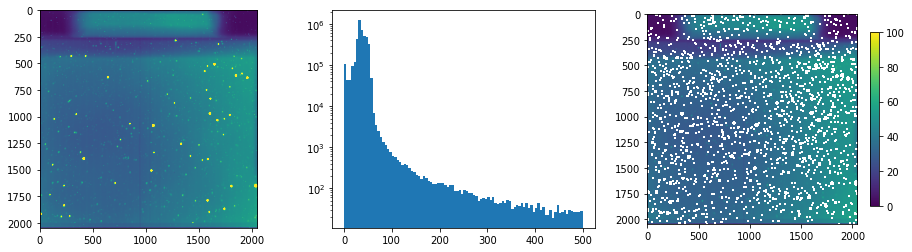

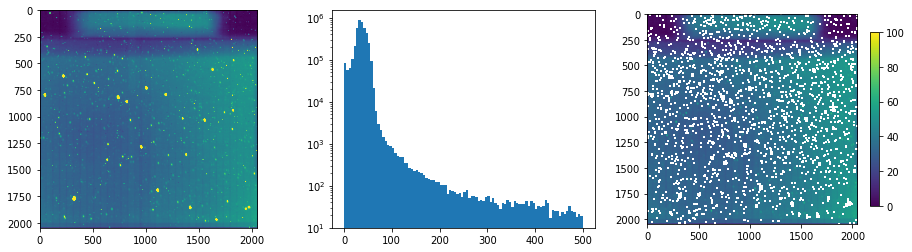

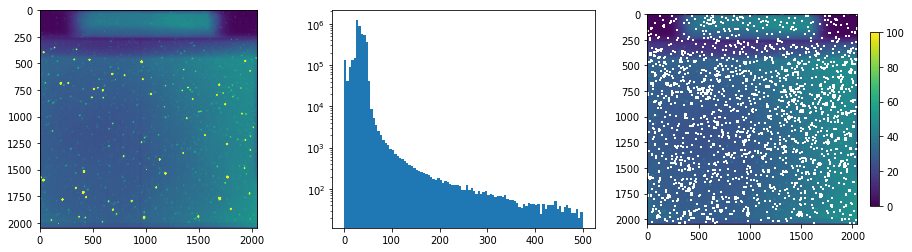

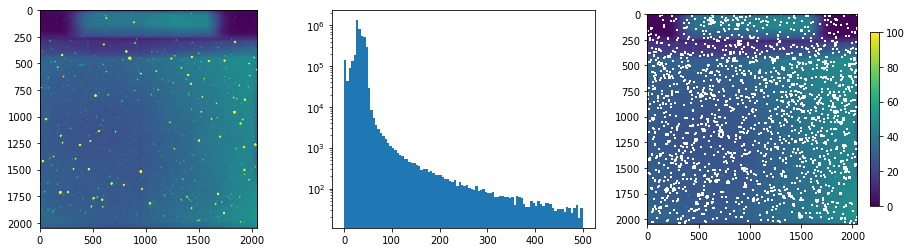

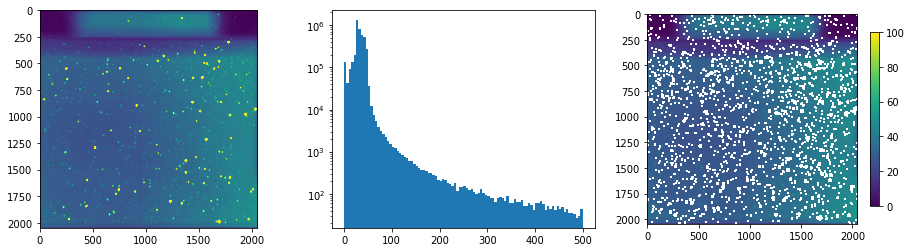

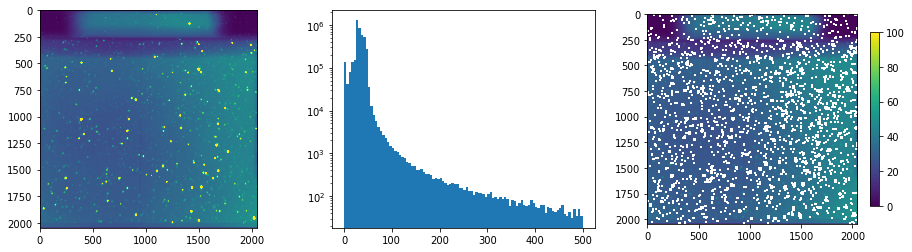

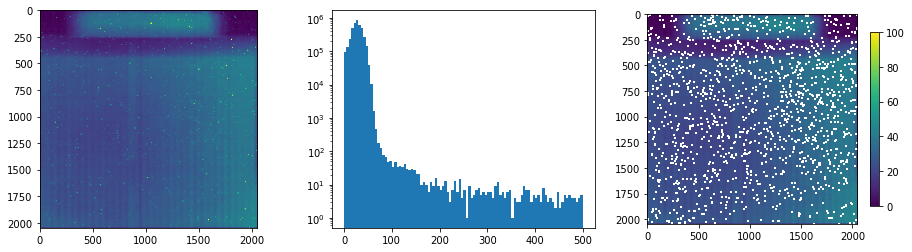

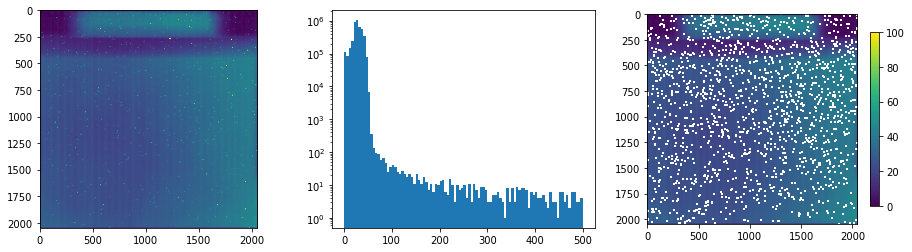

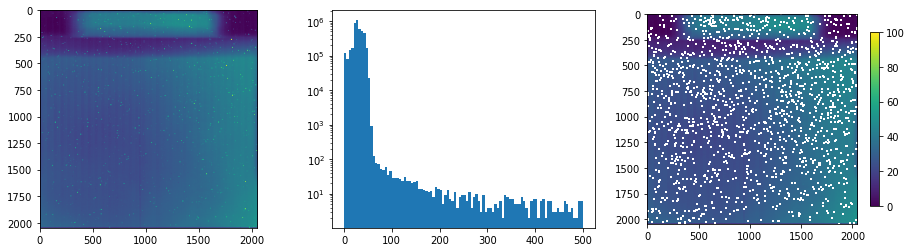

In [35]:

for img in imgs:
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches(16, 4)
    ax0 = axs[0]
    ax1 = axs[1]
    ax2 = axs[2]
    
    img = img * (4*10**(-6))
    ax0 = ax0.imshow(img,vmin=0,vmax = 100)
    ax1.hist(img.flatten(),bins=100,range=(0,500),log=True)
    
    img = np.where(img < 100, img , np.nan)
    img = np.where(img > -100, img , np.nan)
    im = ax2.imshow(img,vmin = 0,vmax = 100)
    cbar = fig.colorbar(im,ax = ax2,shrink=0.8)


In [20]:
eps_files,_=eps_shelf.get_eps_files("dr20210913","armS")
names = [""]*len(eps_files)
for i,file_name in enumerate(eps_files):
    name = file_name.split("/")[-1].split(".")[0]
    names[i] = name
print(names)

['field2', 'field3', 'field4', 'field5', 'field6', 'field7', 'field8_1', 'field8_2', 'field8_3']


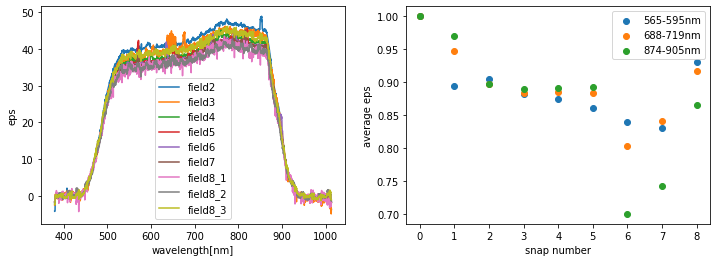

In [28]:
lvf_imgs = eps_shelf.get_lvf_imgs("dr20210913","armS")

imgs_shelf =shelf.make_img_shelf(names,lvf_imgs)
imgs_shelf.convert_volt_to_eps()
imgs_shelf.star_clip(100)
imgs_shelf.substract_bg()
fig,axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
numbers = np.arange(len(imgs))
eps_averages = np.zeros((3,len(imgs)))

for i,img in enumerate(imgs_shelf.imgs):
    y_lvf = np.nanmean(img,axis = 0)
    pixel = np.arange(len(img[0]))
    x_lvf = shelf.convert_pixel_to_lvf(pixel,"armS")    

    ax = axs[0]
    ax.plot(x_lvf,y_lvf,label=names[i],)
    eps_averages[0][i] = np.nanmean(img[0][600:700])
    eps_averages[1][i] = np.nanmean(img[0][1000:1100])
    eps_averages[2][i] = np.nanmean(img[0][1600:1700])
    

ax.set_ylabel('eps')
ax.set_xlabel('wavelength[nm]')
ax.legend()

ax2 = axs[1]

ax2.set_ylabel('average eps')
ax2.set_xlabel('snap number')

lvf_area = shelf.convert_pixel_to_lvf(np.array([600,700]),"armS")    
tag0 = str(int(lvf_area[0])) +"-"+ str(int(lvf_area[1]))+"nm"
ax2.scatter(numbers,eps_averages[0]/eps_averages[0][0],label = tag0)
lvf_area = shelf.convert_pixel_to_lvf(np.array([1000,1100]),"armS")                            
tag1 = str(int(lvf_area[0])) +"-"+ str(int(lvf_area[1]))+"nm"
ax2.scatter(numbers,eps_averages[1]/eps_averages[1][0],label = tag1)

lvf_area = shelf.convert_pixel_to_lvf(np.array([1600,1700]),"armS")                            
tag2 = str(int(lvf_area[0])) +"-"+ str(int(lvf_area[1]))+"nm"
ax2.scatter(numbers,eps_averages[2]/eps_averages[2][0],label = tag2)
ax2.legend()

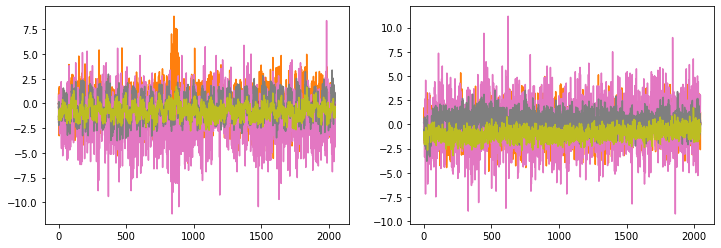

In [93]:
eps_imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

imgs_shelf =shelf.make_img_shelf(names,eps_imgs)
imgs_shelf.convert_volt_to_eps()
imgs_shelf.star_clip(100)


fig,axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

ax = axs[0]
for i,img in enumerate(imgs_shelf.imgs):
    
    line_noise = np.nanmean(img[0:4,:],axis=0) 
    ax.plot(pixel,line_noise,label=names[i],)
    
ax = axs[1]
for i,img in enumerate(imgs_shelf.imgs):
    
    line_noise = np.nanmean(img[:,0:4,],axis=1) 
    ax.plot(pixel,line_noise,label=names[i],)

# ax = axs[1]
# for i,img in enumerate(imgs_shelf.imgs):
#     pixel,img_averages = imgs_shelf.getLowPixelVSIntensity(500,600)
#     line_noise = np.nanmean(img[:,0:4],axis=1)
# #     a = np.array([0, 1, 2, 3, 4, 5])
#     v = np.array([1/4, 1/4, 1/4, 1/4,])
#     line_noise_smooth = np.convolve(line_noise, v, mode ="same")
#     ax.plot(pixel,line_noise_smooth,label=names[i],)



# for i,y in enumerate(img_averages):
#     ax.plot(pixel,y,label=names[i],)
    

# imgs_shelf.substract_line_noise()

# pixel,img_averages = imgs_shelf.getLowPixelVSIntensity(500,600)
# ax = axs[1]
# for i,y in enumerate(img_averages):
#     ax.plot(pixel,y,label=names[i],)
    

# ax.set_ylabel('eps')
# ax.set_xlabel('wavelength[nm]')
# ax.legend()


In [148]:
%load_ext memory_profiler
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import os
from fits_reader import shelf
from fits_reader import fits_reader
import importlib
import glob
importlib.reload(fits_reader)
importlib.reload(shelf)
import gc
import numpy as np
arms = ["armS","armM","armL"]
home_directory = os.environ['HOME']
season_name = "/202106_flight"
# /Volumes/ciber2/Data/202106_flight/dr20210913/ch3
experiment_name = "/"
experiment_directory = home_directory + season_name + experiment_name
print(experiment_directory)
eps_shelf = shelf.make_reduction_shelf(experiment_directory)
imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
/home/ciber2/202106_flight/


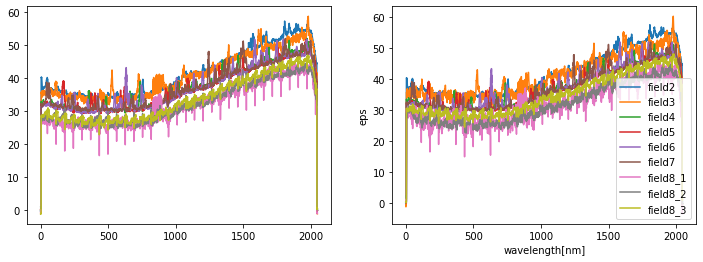

In [102]:
eps_imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

imgs_shelf =shelf.make_img_shelf(names,eps_imgs)
imgs_shelf.convert_volt_to_eps()
imgs_shelf.star_clip(100)


fig,axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

pixel,img_averages = imgs_shelf.getLowPixelVSIntensity(500,600)

ax = axs[0]
for i,y in enumerate(img_averages):
    ax.plot(pixel,y,label=names[i],)

imgs_shelf.substract_line_noise()

pixel,img_averages = imgs_shelf.getLowPixelVSIntensity(500,600)

ax = axs[1]
for i,y in enumerate(img_averages):
    ax.plot(pixel,y,label=names[i],)
    

ax.set_ylabel('eps')
ax.set_xlabel('wavelength[nm]')
ax.legend()


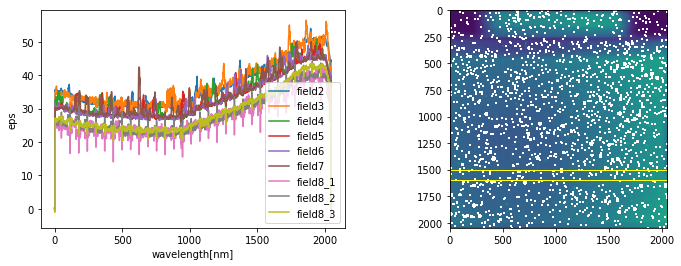

In [155]:
eps_imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

imgs_shelf =shelf.make_img_shelf(names,eps_imgs)
imgs_shelf.convert_volt_to_eps()
imgs_shelf.star_clip(100)


fig,axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
y_start = 1500
ax = axs[0]
pixel,img_averages = imgs_shelf.getLowPixelVSIntensity(y_start,y_start+100)
for i,y in enumerate(img_averages):
    ax.plot(pixel,y,label=names[i],)    

ax.set_ylabel('eps')
ax.set_xlabel('wavelength[nm]')
ax.legend()

numbers = np.arange(len(img_averages))

eps_averages = np.zeros(len(imgs))
ax = axs[1]
im = ax.imshow(eps_imgs[0],vmin=0,vmax = 100)

r = patches.Rectangle(xy=(0, y_start), width=2048, height=100, ec='yellow', fill=False)
ax.add_patch(r)

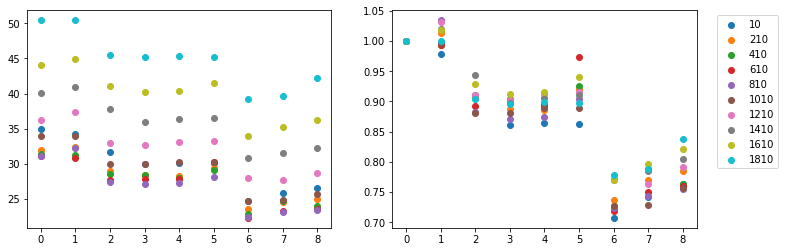

In [157]:
eps_imgs = eps_shelf.get_eps_imgs("dr20210913","armS")

imgs_shelf =shelf.make_img_shelf(names,eps_imgs)
imgs_shelf.convert_volt_to_eps()
imgs_shelf.star_clip(100)


fig,axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)

ax = axs[0]
ax2 = axs[1]

numbers = np.arange(len(imgs_shelf.imgs))
eps_averages = np.zeros(len(imgs_shelf.imgs))

for x_ind in np.arange(10):
    x_start = x_ind*200 + 10
    square_images = imgs_shelf.cut_out_square(y_start,y_start+100,x_start,x_start+100)

    for i,square_image in enumerate(square_images):
        eps_averages[i] = np.nanmean(square_image)
    ax.scatter(numbers,eps_averages,label=str(x_start),)    
    ax2.scatter(numbers,eps_averages/eps_averages[0],label=str(x_start),)    
# ax.legend()
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=1)